In [70]:
# basic libraries
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

import re

# preprocessing and modelling
# import here: sklearn models (logistic regression, ensemble, tree, ensemble), preprocessing, pipeline, metrics (confusiong matrix, classification report), xgboost

In [9]:
df = pd.read_csv("..\data\kepler_exoplanet_search_results.csv", index_col=0)

In [10]:
df.shape
pd.set_option('display.max_columns', None) #ensuring the dataframe displays all columns
df.head(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,2.036000e-05,-2.036000e-05,171.201160,0.001410,-0.001410,0.538,0.030,-0.428,4.59450,0.06100,-0.06100,1517.5,24.2,-24.2,3.90,1.27,-0.42,835.0,NaN,NaN,114.81,112.85,-36.70,66.5,1.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,1.046000e-05,-1.046000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160.0,NaN,NaN,427.65,420.33,-136.70,40.2,2.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,2.566589,1.781000e-05,-1.781000e-05,179.554370,0.004610,-0.004610,0.755,0.212,-0.523,2.42900,0.16500,-0.16500,226.5,16.8,-16.8,1.59,0.52,-0.17,1360.0,NaN,NaN,807.74,793.91,-258.20,15.0,3.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
9,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,7.361790,2.128000e-05,-2.128000e-05,132.250530,0.002530,-0.002530,1.169,7.133,-0.044,5.02200,0.13600,-0.13600,233.7,5.8,-5.8,39.21,6.45,-9.67,1342.0,NaN,NaN,767.22,349.28,-365.49,47.7,1.0,q1_q17_dr25_tce,6227.0,111.0,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660


In [14]:
df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9201.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9.201000e+03,9110.000000,9110.000000,9201.000000,9201.000000,9201.000000,9201.000000,0.0,0.0,9.243000e+03,9.243000e+03,9.243000e+03,9201.000000,9218.000000,9201.000000,9096.000000,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,-0.009933,0.735105,1.959861,-0.332557,5.621606,0.339942,-0.339942,2.379134e+04,123.197563,-123.197563,102.891778,17.657684,-33.023314,1085.385828,NaN,NaN,7.745737e+03,3.750698e+03,-4.043522e+03,259.895001,1.243654,5706.823280,144.635554,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,67.918960,0.023097,0.023097,3.348832,9.421653,1.249828,6.471554,0.669823,0.669823,8.224268e+04,4112.615230,4112.615230,3077.639126,391.138501,1193.519910,856.351161,NaN,NaN,1.592047e+05,5.504421e+04,8.838831e+04,795.806615,0.664573,796.857947,47.052305,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,0.000000,-20.200000,0.000000e+00,0.000000,-388600.000000,0.080000,0.000000,-77180.000000,25.000000,NaN,NaN,0.000000e+00,0.000000e+00,-5.600031e+06,0.000000,1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,-0.010500,0.197000,0.040000,-0.445000,2.437750,0.050800,-0.350000,1.599000e+02,9.600000,-49.500000,1.400000,0.230000,-1.940000,539.000000,NaN,NaN,2.015000e+01,9.190000e+00,-2.873100e+02,12.000000,1.000000,5310.000000,106.000000,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,0.142000,-0.142000,4.211000e+02,20.750000,-20.750000,2.390000,0.520000,-0.300000,878.000000,NaN,NaN,1.416000e+02,7.283000e+01,-4.026000e+01,23.000000,1.000000,5767.000000,157.000000,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,0.010500,-0.001240,0.889000,0.378000,-0.046000,6.276500,0.350000,-0.050800,1.473400e+03,49.500000,-9.600000,14.930000,2.320000,-0.140000,1379.000000,NaN,NaN,8.702900e+02,5.194150e+02,-5.160000e+00,78.000000,1.000000,6112.000000,174.000000,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,14667

(array([3739.,   64.,   73.,   43.,   40.,   45.,   32.,   36.,   33.,
          31.,   28.,   31.,   32.,   37.,   36.,   72.,   83.,  138.,
         239., 3222.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

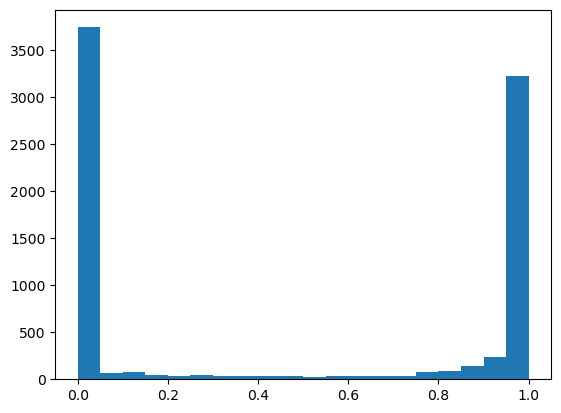

In [17]:
#histogram of koi_score
plt.hist(df['koi_score'], bins=20)

In [11]:
pprint(df.columns)

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


### Basic EDA

In [42]:
columns_without_err = [col for col in df.columns if 'err' not in col.lower()] # creating a list of column names excluding any error columns so see actual number of variables

pprint(columns_without_err)
print(len(columns_without_err))

['kepid',
 'kepoi_name',
 'kepler_name',
 'koi_disposition',
 'koi_pdisposition',
 'koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_duration',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_tce_delivname',
 'koi_steff',
 'koi_slogg',
 'koi_srad',
 'ra',
 'dec',
 'koi_kepmag']
27


In [20]:
df[columns_without_err].describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9218.000000,9201.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,166.183251,0.735105,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.243654,5706.823280,4.310157,1.728712,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,67.918960,3.348832,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.664573,796.857947,0.432606,6.127185,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.197000,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,5310.000000,4.218000,0.829000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.889000,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,6112.000000,4.543000,1.345000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


In [21]:
df[columns_without_err].describe(include=['object'])

,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_tce_delivname
count,9564,2294,9564,9564,9218
unique,9564,2294,3,2,3
top,K00752.01,Kepler-227 b,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
freq,1,1,5023,5068,8054


In [25]:
#list unique values for koi_tce_delivname
df['koi_tce_delivname'].unique()

array(['q1_q17_dr25_tce', 'q1_q16_tce', nan, 'q1_q17_dr24_tce'],
      dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9564 entries, 1 to 9564
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2294 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 non-n

In [28]:
obj_cols_count = len(df.select_dtypes(include=['object']).columns)
num_cols_count = len(df.select_dtypes(exclude=['object']).columns)

print(f'Number of non-numerical columns: {obj_cols_count}')
print(f'Number of numerical columns: {num_cols_count}')


Number of non-numerical columns: 5
Number of numerical columns: 44


We will want to identify which columns to keep, and which to remove. In order to do so we should reference the column definitions, which can read below, taken directly from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html#tce_info).

**Note**: These variables are the *default* variables included when calling the Exoplanet Archive API. In total, there are 81 columns that are available to be called by the API.

#### Column Definitions:

Identification Columns:
- `kepid`: Target identification number, as listed in the [Kepler Input Catalog (KIC)](https://ui.adsabs.harvard.edu/abs/2011AJ....142..112B/abstract). The KIC was derived from a ground-based imaging survey of the Kepler field conducted prior to launch. The survey's purpose was to identify stars for the Kepler exoplanet survey by magnitude and color. The full catalog of 13 million sources can be searched at the [MAST archive](http://archive.stsci.edu/kepler/kic10/search.php). The subset of 4 million targets found upon the Kepler CCDs can be searched via the [Kepler Target Search form](http://archive.stsci.edu/kepler/kepler_fov/search.php). The Kepler ID is unique to a target and there is only one Kepler ID per target.

- `kepoi_name`: A number used to identify and track a Kepler Object of Interest (KOI). A KOI is a target identified by the Kepler Project that displays at least one transit-like sequence within Kepler time-series photometry that appears to be of astrophysical origin and initially consistent with a planetary transit hypothesis. A KOI name has an integer and a decimal part of the format KNNNNN.DD. The integer part designates the target star; the two-digit decimal part identifies a unique transiting object associated with that star. It is not necessarily the planetary candidate listed in that order within a DV report, nor does it indicate the distance of the planet from the the host star relative to other planets in the system. 

Exoplanet Archive Information:

- `kepler_name`: Kepler number name in the form "Kepler-N," plus a lower-case letter, identifying the planet. In general, these numbers are easier to remember than the corresponding KOI or KIC/KepID designations and are intended to clearly indicate a class of objects that have been confirmed or validated as planets—a step up from the planet candidate designation.

- `koi_disposition`: Exoplanet Archive Disposition. The category of this KOI from the Exoplanet Archive. Current values are CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED. All KOIs marked as CONFIRMED are also listed in the Exoplanet Archive Confirmed Planet table. Designations of CANDIDATE, FALSE POSITIVE, and NOT DISPOSITIONED are taken from the [Disposition Using Kepler Data](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html#pdisposition).

Project Disposition Columns:

- `koi_pdisposition`: Disposition Using Kepler Data. The pipeline flag that designates the most probable physical explanation of the KOI. Typical values are FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE. The value of this flag may change over time as the evaluation of KOIs proceeds to deeper levels of analysis using Kepler time-series pixel and light curve data, or follow-up observations. A not dispositioned value corresponds to objects for which the disposition tests have not yet been completed. A false positive has failed at least one of the tests described in [Batalha et al. (2012)](https://ui.adsabs.harvard.edu/abs/2013ApJS..204...24B/abstract). A planetary candidate has passed all prior tests conducted to identify false positives, although this does not a priori mean that all possible tests have been conducted. A future test may confirm this KOI as a false positive. False positives can occur when: 1) the KOI is in reality an eclipsing binary star, 2) the Kepler light curve is contaminated by a background eclipsing binary, 3) stellar variability is confused for coherent planetary transits, or 4) instrumental artifacts are confused for coherent planetary transits.

- `koi_score`: Disposition Score. A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition. The value is calculated from a Monte Carlo technique such that the score's value is equivalent to the frction of iterations where the Robovetter yields a disposition of CANDIDATE.

- `koi_fpflag_nt`: Not Transit-Like Flag. A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections.

- `koi_fpflag_ss`: Stellar Eclipse Flag. A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC.

- `koi_fpflag_co`: Centroid Offset Flag. The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture.

- `koi_fpflag_ec`: Ephemeris Match Indicates Contamination Flag. The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.

Transit Properties:

Note: Error columns represent error symmetric around the measured value. `err1` = error above the measured value and `err2` = error below the measured value. 

- `koi_period`: Orbital Period (days). The interval between consecutive planetary transits.
    - `koi_period_err1`, `koi_period_err2` as error columns

- `koi_time0bk`: Transit Epoch (BJD - 2,454,833.0). The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. The offset corresponds to 12:00 on Jan 1, 2009 UTC. 
    - `koi_time0bk_err1`, `koi_time0bk_err2` as error columns

- `koi_impact`: Impact Parameter. The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius. 
    - `koi_impact_err1`, `koi_impact_err2` as error columns

- `koi_duration`: Transit Duration (hours). The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. Contact times are typically computed from a best-fit model produced by a [Mandel-Agol (2002)](https://ui.adsabs.harvard.edu/abs/2002ApJ...580L.171M) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.
    - `koi_duration_err1`, `koi_duration_err2` as error columns

- `koi_depth`: Transit Depth (parts per million). The fraction of stellar flux lost at the minimum of the planetary transit. Transit depths are typically computed from a best-fit model produced by a [Mandel-Agol (2002)](https://ui.adsabs.harvard.edu/abs/2002ApJ...580L.171M) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris. 

- `koi_prad`: Planetary Radius (Earth radii). The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius. 
    - `koi_prad_err1`, `koi_prad_err2` as error columns

- `koi_teq`: Equilibrium Temperature (Kelvin). Approximation for the temperature of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.
    - `koi_teq_err1`, `koi_teq_err2` as error columns

- `koi_insol`: Insolation Flux [Earth flux]. Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.

Threshold-Crossing Event (TCE) Information:

- `koi_model_snr`: Transit Signal-to-Noise. Transit depth normalized by the mean uncertainty in the flux during the transits.

- `koi_tce_plnt_num`: TCE Planet Number federated to the KOI.

- `koi_tce_delivname`: TCE delivery name corresponding to the TCE data federated to the KOI.

Stellar Parameters:

- `koi_steff`: Stellar Effective Temperature (Kelvin). The photospheric temperature of the star.
    -  	`koi_steff_err1`, `koi_steff_err2` as error columns 

- `koi_slogg`: Stellar Surface Gravity (log<sub>10</sub>(cm s<sup>-2</sup>). The base-10 logarithm of the acceleration due to gravity at the surface of the star.
    - `koi_slogg_err1`, `koi_slogg_err2` as error columns

- `koi_srad`: Stellar Radius (solar radii). The photospheric radius of the star
    -  	`koi_smass_err1`, `koi_smass_err2` as error columns

KIC Parameters:

- `ra`: RA (deg). KIC Right Ascension.
    - `ra_err` as error column

- `dec`: Dec (deg). KIC Declination.
    - `dec_err` as error column

- `koi_kepmag`: Kepler-band (mag). Kepler-band (mag). 
    - `koi_kepmag_err` as error column


Now that we have the column descriptions, units, and titles, we can identify columns that will not be conducive to our study. Namely, the `Identification Columns` as a whole can be dropped, as they are not a measured value, and do not contribute useful information when building a model.

In [54]:
#kepler objects of interest
kois = df.copy() #maintain a loaded copy of our dataframe as to not reload the dataset if we need to start over

#dropping identification columns
kois = kois.drop(['kepid', 'kepoi_name', 'kepler_name'], axis=1)

Even with the variable descriptions, it can be difficult to understand exactly what each variable is without further reasearch or some level of domain knowledge. However, this should not prevent us from identifying which variables are quantitative or categorical and the various subtypes of those two.

Below we have labelled each remaining column with it's data type and variable type.

| Variable   | Data Type   | Variable Type   |
|------------|-------------|-----------------|
| `koi_disposition`  | Categorical      | Nominal        |
| `koi_pdisposition` | Categorical | Nominal |
| `koi_score`<sup>1</sup>  | Quantitative      | Continuous        |
| `koi_fpflag_nt`  | Categorical      | Binary        |
| `koi_fpflag_ss` | Categorical    | Binary        |
| `koi_fpflag_co` | Categorical    | Binary        |
| `koi_fpflag_ec` | Categorical    | Binary        |
| `koi_period` | Quantitative | Continuous |
| `koi_impact` | Quantitative | Continuous |
| `koi_period` | Quantitative | Continuous |
| `koi_duration` | Quantitative | Continuous |
| `koi_depth` | Quantitative | Continuous |
| `koi_prad` | Quantitative | Continuous |
| `koi_teq` | Quantitative | Continuous |
| `koi_insol` | Quantitative | Continuous |
| `koi_model_snr` | Quantitative | Continuous |
| `koi_tce_plnt_num` | Categorical | Nominal |
| `koi_tce_delivname`<sup>2</sup> | Categorical | Ordinal |
| `koi_steff` | Quantitative | Continuous |
| `koi_slogg` | Quantitative | Continuous |
| `koi_srad` | Quantitative | Continuous |
| `ra` | Quantitative | Continuous |
| `dec` | Quantitative | Continuous |
| `koi_kepmag` | Quantitative | Continuous |




<sup>1</sup>`koi_score` is a continous variable between 0 and 1 to indicate the confidence that a given observation is a confirmed planet or false-positive. However, looking at the distribution, shown above in a histogram, we may want to simplify the variable and convert it to a binary classification variable. One option is to consider value above or below certain thresholds to be mapped to 1 or 0 respectively. Values inbetween this threshold can be filtered out.

<sup>2</sup> The main purpose of `koi_tce_delivname`is to identify the data release of a given observation. As such, this particular variable can be considered an identifcation label and thus removed from our dataset for further analysis.

In [55]:
kois = kois.drop(['koi_tce_delivname'], axis=1)

In [56]:
kois.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
4,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
5,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [57]:
#recompile list of columns without error
col_without_err = [col for col in kois.columns if 'err' not in col.lower()]

pprint(col_without_err)

['koi_disposition',
 'koi_pdisposition',
 'koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_duration',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_slogg',
 'koi_srad',
 'ra',
 'dec',
 'koi_kepmag']


### Data Exploration Continued
1. Checking Null values
2. Looking for outliers

In [58]:
kois.isnull().sum()

koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_er

`koi_teq_err1` and `koi_tep_err2` both contain only Null values so we can drop these two columns as well.

In [59]:
#dropping koi_teq_err columns
kois = kois.drop(['koi_teq_err1', 'koi_teq_err2'], axis=1)

In [60]:
kois.shape

(9564, 43)

In order to identify outliers, we can look at extreme error values rather than the measurements themselves. Without domain knowledge, it will be harder to correctly remove potential outliers based on the measurements only. 

In [61]:
#create a dataframe of only the error value columns
kois_err = kois[[col for col in kois.columns if 'err' in col.lower()]]

We can observe the error distributions visually.

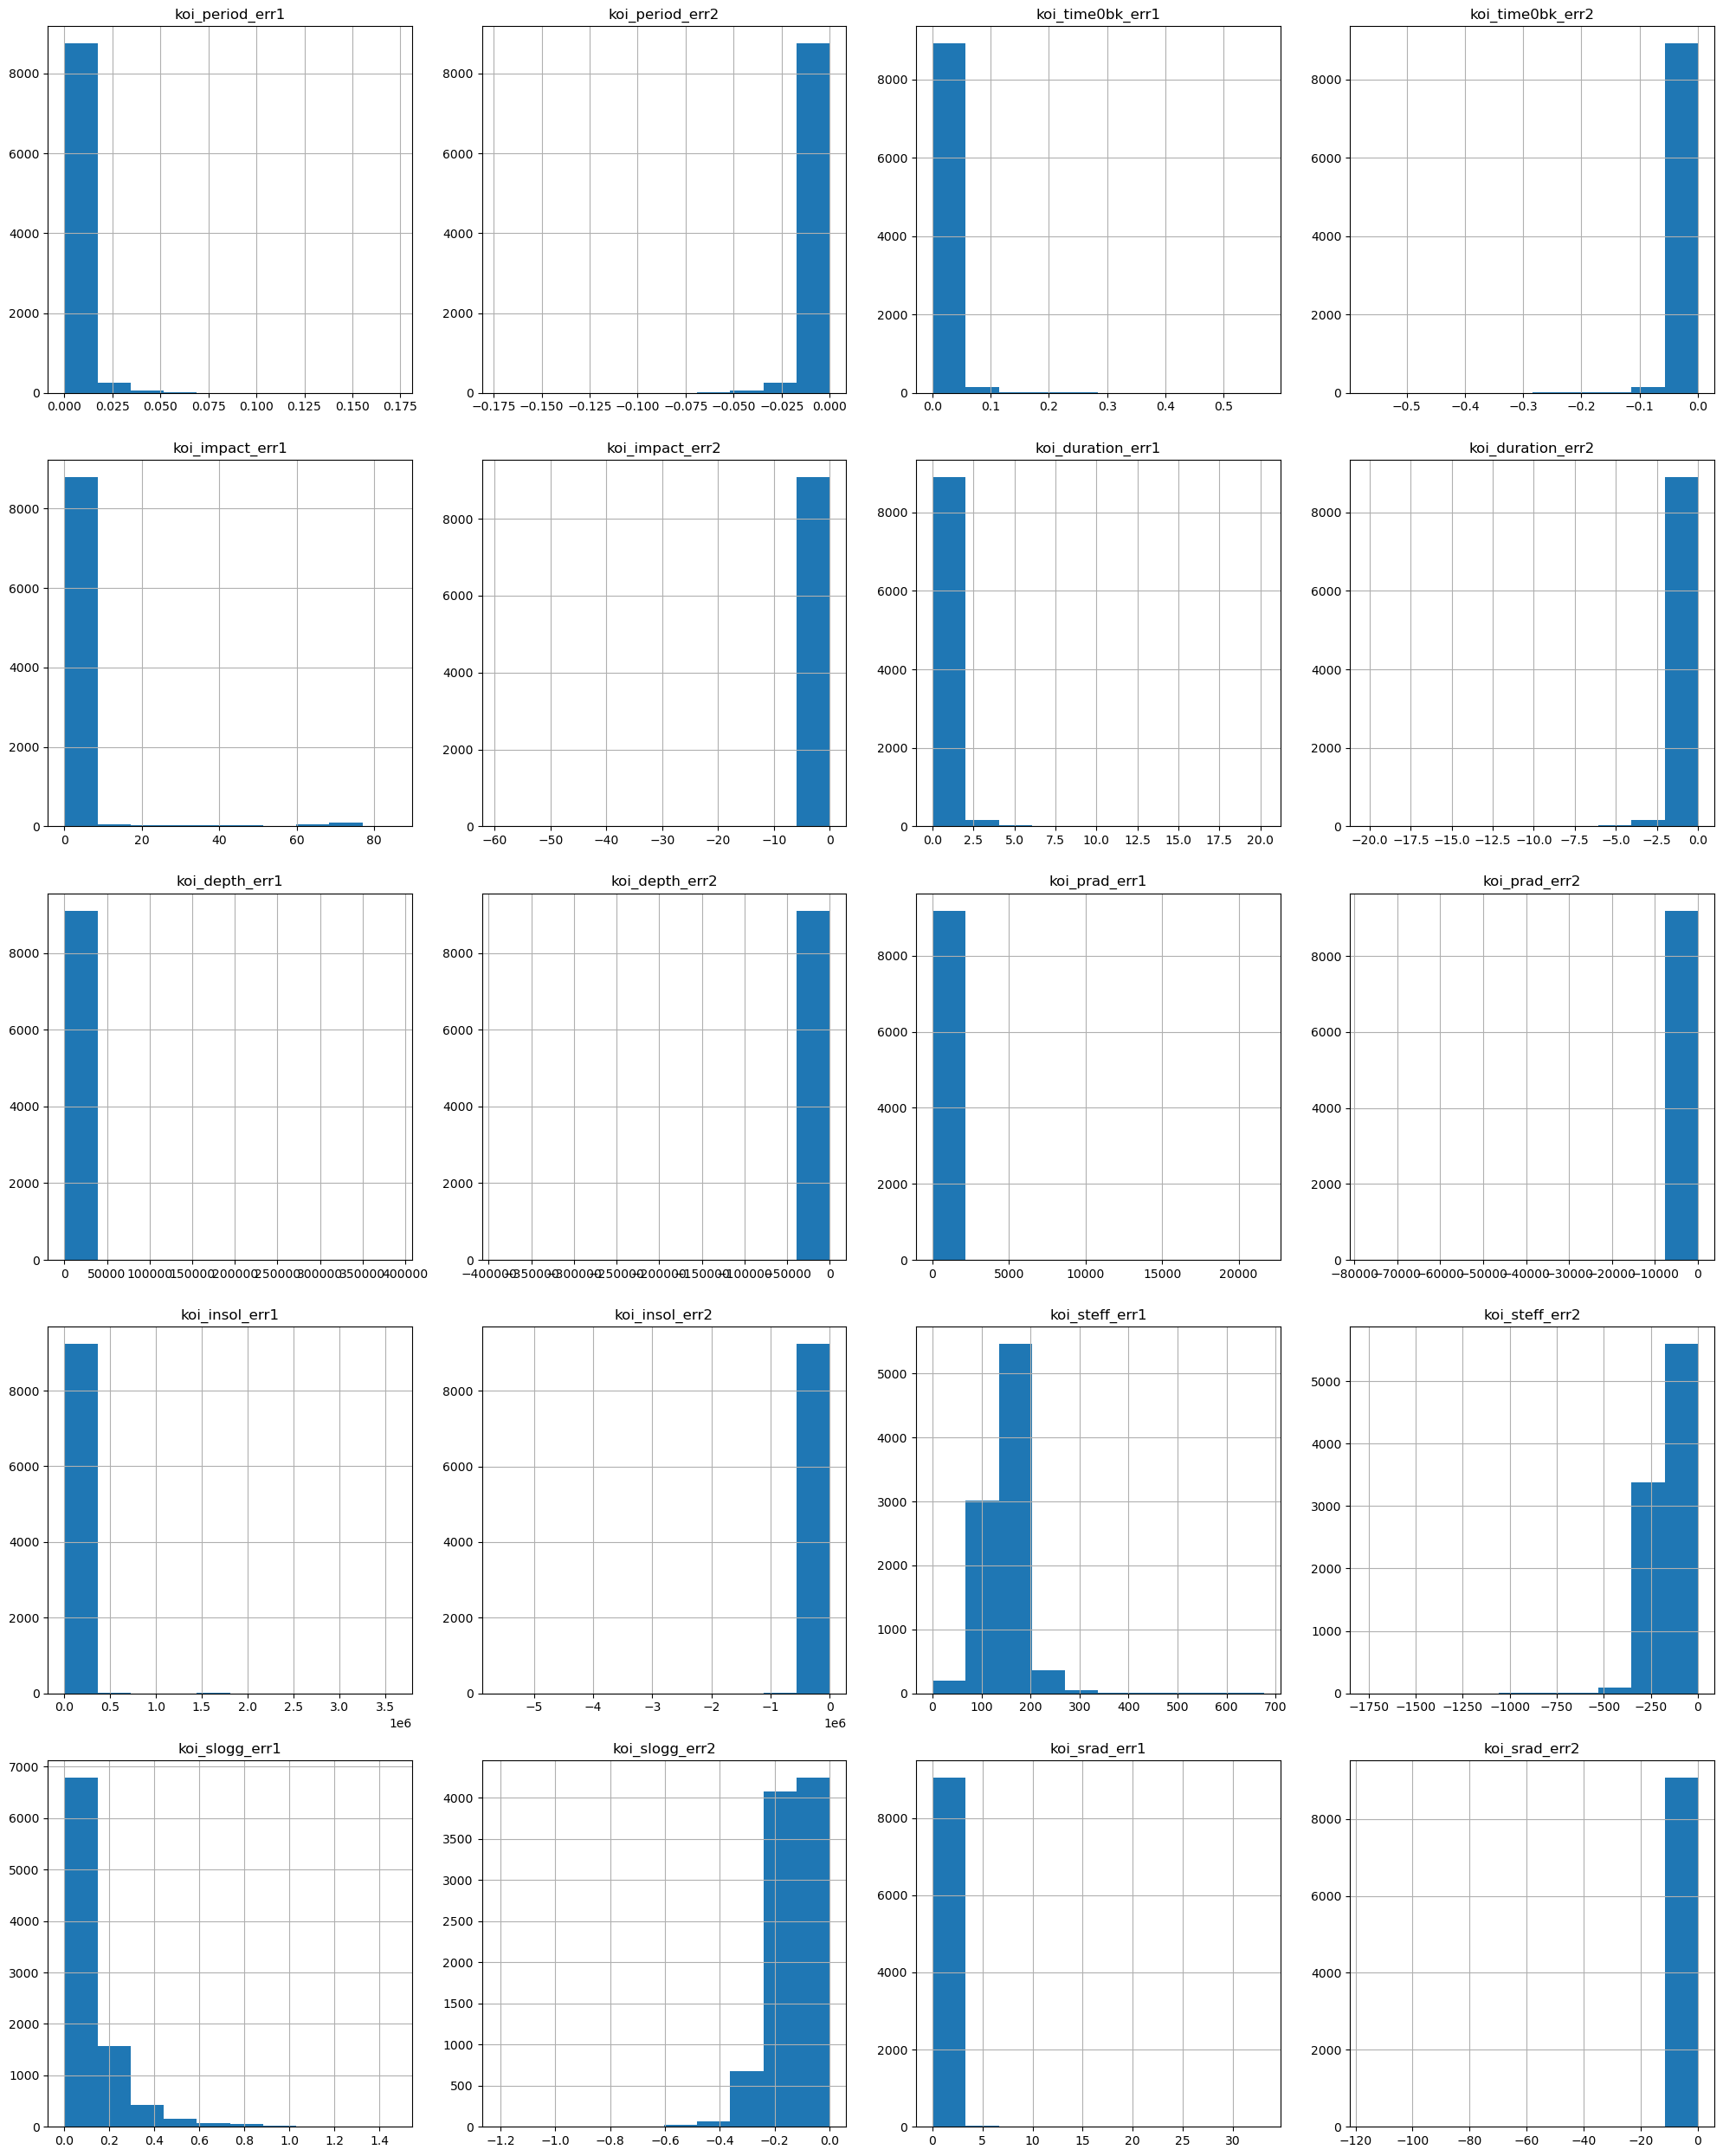

In [67]:
#create plots of distributions of kois_err

# Setting up the figure with 5 rows and 4 columns
fig, axes = plt.subplots(5, 4, figsize=(20, 25)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2D array of axes for easy iterating

# Plotting histograms for each column
for i, col in enumerate(kois_err.columns):
    kois_err[col].hist(ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [66]:
kois_err.describe()

,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_impact_err1,koi_impact_err2,koi_duration_err1,koi_duration_err2,koi_depth_err1,koi_depth_err2,koi_prad_err1,koi_prad_err2,koi_insol_err1,koi_insol_err2,koi_steff_err1,koi_steff_err2,koi_slogg_err1,koi_slogg_err2,koi_srad_err1,koi_srad_err2
count,9110.000000,9110.000000,9110.000000,9110.000000,9110.000000,9110.000000,9110.000000,9110.000000,9110.000000,9110.000000,9201.000000,9201.000000,9.243000e+03,9.243000e+03,9096.000000,9081.000000,9096.000000,9096.000000,9096.000000,9096.000000
mean,0.002148,-0.002148,0.009933,-0.009933,1.959861,-0.332557,0.339942,-0.339942,123.197563,-123.197563,17.657684,-33.023314,3.750698e+03,-4.043522e+03,144.635554,-162.265059,0.120738,-0.143161,0.362292,-0.394806
std,0.008236,0.008236,0.023097,0.023097,9.421653,1.249828,0.669823,0.669823,4112.615230,4112.615230,391.138501,1193.519910,5.504421e+04,8.838831e+04,47.052305,72.746348,0.132837,0.085477,0.930870,2.168213
min,0.000000,-0.172500,0.000009,-0.569000,0.000000,-59.320000,0.000000,-20.200000,0.000000,-388600.000000,0.000000,-77180.000000,0.000000e+00,-5.600031e+06,0.000000,-1762.000000,0.000000,-1.207000,0.000000,-116.137000
25%,0.000005,-0.000276,0.001240,-0.010500,0.040000,-0.445000,0.050800,-0.350000,9.600000,-49.500000,0.230000,-1.940000,9.190000e+00,-2.873100e+02,106.000000,-198.000000,0.042000,-0.196000,0.129000,-0.250000
50%,0.000035,-0.000035,0.004130,-0.004130,0.193000,-0.207000,0.142000,-0.142000,20.750000,-20.750000,0.520000,-0.300000,7.283000e+01,-4.026000e+01,157.000000,-160.000000,0.070000,-0.128000,0.251000,-0.111000
75%,0.000276,-0.000005,0.010500,-0.001240,0.378000,-0.046000,0.350000,-0.050800,49.500000,-9.600000,2.320000,-0.140000,5.194150e+02,-5.160000e+00,174.000000,-114.000000,0.149000,-0.088000,0.364000,-0.069000
max,0.172500,0.000000,0.569000,-0.000009,85.540000,0.000000,20.200000,0.000000,388600.000000,0.000000,21640.000000,0.000000,3.617133e+06,0.000000e+00,676.000000,0.000000,1.472000,0.000000,33.091000,0.000000


We can see from the distributions and from the descriptive statistics for the erro values that we do seem to have some extreme values, again, without domain knowledge, we may want to instead look at the error as a *percentage* rather than a measured value. 

Outliers can then be identified as having a large percentage of error. This eliminates the need for a more indepth understanding of the units or context of each measurement. 

In [68]:
kois_err.head()

,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_impact_err1,koi_impact_err2,koi_duration_err1,koi_duration_err2,koi_depth_err1,koi_depth_err2,koi_prad_err1,koi_prad_err2,koi_insol_err1,koi_insol_err2,koi_steff_err1,koi_steff_err2,koi_slogg_err1,koi_slogg_err2,koi_srad_err1,koi_srad_err2
rowid,,,,,,,,,,,,,,,,,,,,
1,2.775000e-05,-2.775000e-05,0.002160,-0.002160,0.318,-0.146,0.08190,-0.08190,19.5,-19.5,0.26,-0.15,29.45,-16.65,81.0,-81.0,0.064,-0.096,0.105,-0.061
2,2.479000e-04,-2.479000e-04,0.003520,-0.003520,0.059,-0.443,0.11600,-0.11600,35.5,-35.5,0.32,-0.19,2.87,-1.62,81.0,-81.0,0.064,-0.096,0.105,-0.061
3,1.494000e-05,-1.494000e-05,0.000581,-0.000581,5.126,-0.077,0.03410,-0.03410,171.0,-171.0,3.92,-1.31,31.04,-10.49,158.0,-176.0,0.044,-0.176,0.233,-0.078
4,2.630000e-07,-2.630000e-07,0.000115,-0.000115,0.115,-0.092,0.00537,-0.00537,12.8,-12.8,8.50,-2.83,668.95,-230.35,157.0,-174.0,0.053,-0.168,0.201,-0.067
5,3.761000e-06,-3.761000e-06,0.001130,-0.001130,0.235,-0.478,0.04200,-0.04200,16.9,-16.9,0.88,-0.35,874.33,-314.24,169.0,-211.0,0.070,-0.210,0.334,-0.133


In [108]:
prcnt_err = pd.DataFrame()

for col1 in kois.columns:
    for col2 in kois_err.columns:
        # Check for col1_err
        if re.match(f"^{re.escape(col1)}_err$", col2):
            prcnt_err[f'{col1}_percent_err'] = kois_err[col2].div(kois[col1]).replace([np.inf, -np.inf], np.nan)
        # Check for col1_err1
        elif re.match(f"^{re.escape(col1)}_err1$", col2):
            prcnt_err[f'{col1}_percent_err1'] = kois_err[col2].div(kois[col1]).replace([np.inf, -np.inf], np.nan)
        # Check for col1_err2
        elif re.match(f"^{re.escape(col1)}_err2$", col2):
            prcnt_err[f'{col1}_percent_err2'] = kois_err[col2].div(kois[col1]).replace([np.inf, -np.inf], np.nan)


In [115]:
print(prcnt_err.shape)
prcnt_err.head(10)

(9564, 20)


,koi_period_percent_err1,koi_period_percent_err2,koi_time0bk_percent_err1,koi_time0bk_percent_err2,koi_impact_percent_err1,koi_impact_percent_err2,koi_duration_percent_err1,koi_duration_percent_err2,koi_depth_percent_err1,koi_depth_percent_err2,koi_prad_percent_err1,koi_prad_percent_err2,koi_insol_percent_err1,koi_insol_percent_err2,koi_steff_percent_err1,koi_steff_percent_err2,koi_slogg_percent_err1,koi_slogg_percent_err2,koi_srad_percent_err1,koi_srad_percent_err2
rowid,,,,,,,,,,,,,,,,,,,,
1,2.924736e-06,-2.924736e-06,1.266574e-05,-1.266574e-05,2.178082,-1.000000,0.027692,-0.027692,0.031666,-0.031666,0.115044,-0.066372,0.314670,-0.177904,0.014849,-0.014849,0.014327,-0.021491,0.113269,-0.065804
2,4.555446e-06,-4.555446e-06,2.165969e-05,-2.165969e-05,0.100683,-0.755973,0.025738,-0.025738,0.040581,-0.040581,0.113074,-0.067138,0.315038,-0.177827,0.014849,-0.014849,0.014327,-0.021491,0.113269,-0.065804
3,7.507862e-07,-7.507862e-07,3.303947e-06,-3.303947e-06,5.289990,-0.079463,0.019134,-0.019134,0.015791,-0.015791,0.268493,-0.089726,0.789822,-0.266921,0.026995,-0.030070,0.009683,-0.038732,0.268433,-0.089862
4,1.514146e-07,-1.514146e-07,6.752489e-07,-6.752489e-07,0.090125,-0.072100,0.002232,-0.002232,0.001584,-0.001584,0.254035,-0.084579,0.749978,-0.258251,0.027046,-0.029974,0.011613,-0.036810,0.254109,-0.084703
5,1.489156e-06,-1.489156e-06,6.585252e-06,-6.585252e-06,0.335235,-0.681883,0.025385,-0.025385,0.028013,-0.028013,0.320000,-0.127273,0.944038,-0.339293,0.028022,-0.034986,0.015773,-0.047319,0.319312,-0.127151
6,1.835173e-06,-1.835173e-06,8.235926e-06,-8.235926e-06,0.055762,-0.795539,0.013277,-0.013277,0.015947,-0.015947,0.325641,-0.107692,0.982928,-0.319659,0.031260,-0.038372,0.012037,-0.051048,0.324074,-0.108025
7,2.529971e-06,-2.529971e-06,1.098397e-05,-1.098397e-05,0.182415,-0.698163,0.021432,-0.021432,0.027259,-0.027259,0.324910,-0.108303,0.982883,-0.319654,0.031260,-0.038372,0.012037,-0.051048,0.324074,-0.108025
8,6.939171e-06,-6.939171e-06,2.567467e-05,-2.567467e-05,0.280795,-0.692715,0.067929,-0.067929,0.074172,-0.074172,0.327044,-0.106918,0.982878,-0.319657,0.031260,-0.038372,0.012037,-0.051048,0.324074,-0.108025
9,2.890601e-06,-2.890601e-06,1.913036e-05,-1.913036e-05,6.101796,-0.037639,0.027081,-0.027081,0.024818,-0.024818,0.164499,-0.246621,0.455254,-0.476382,0.017826,-0.019913,0.045660,-0.024586,0.164454,-0.246680


Observe the distribution of the erro by percentage

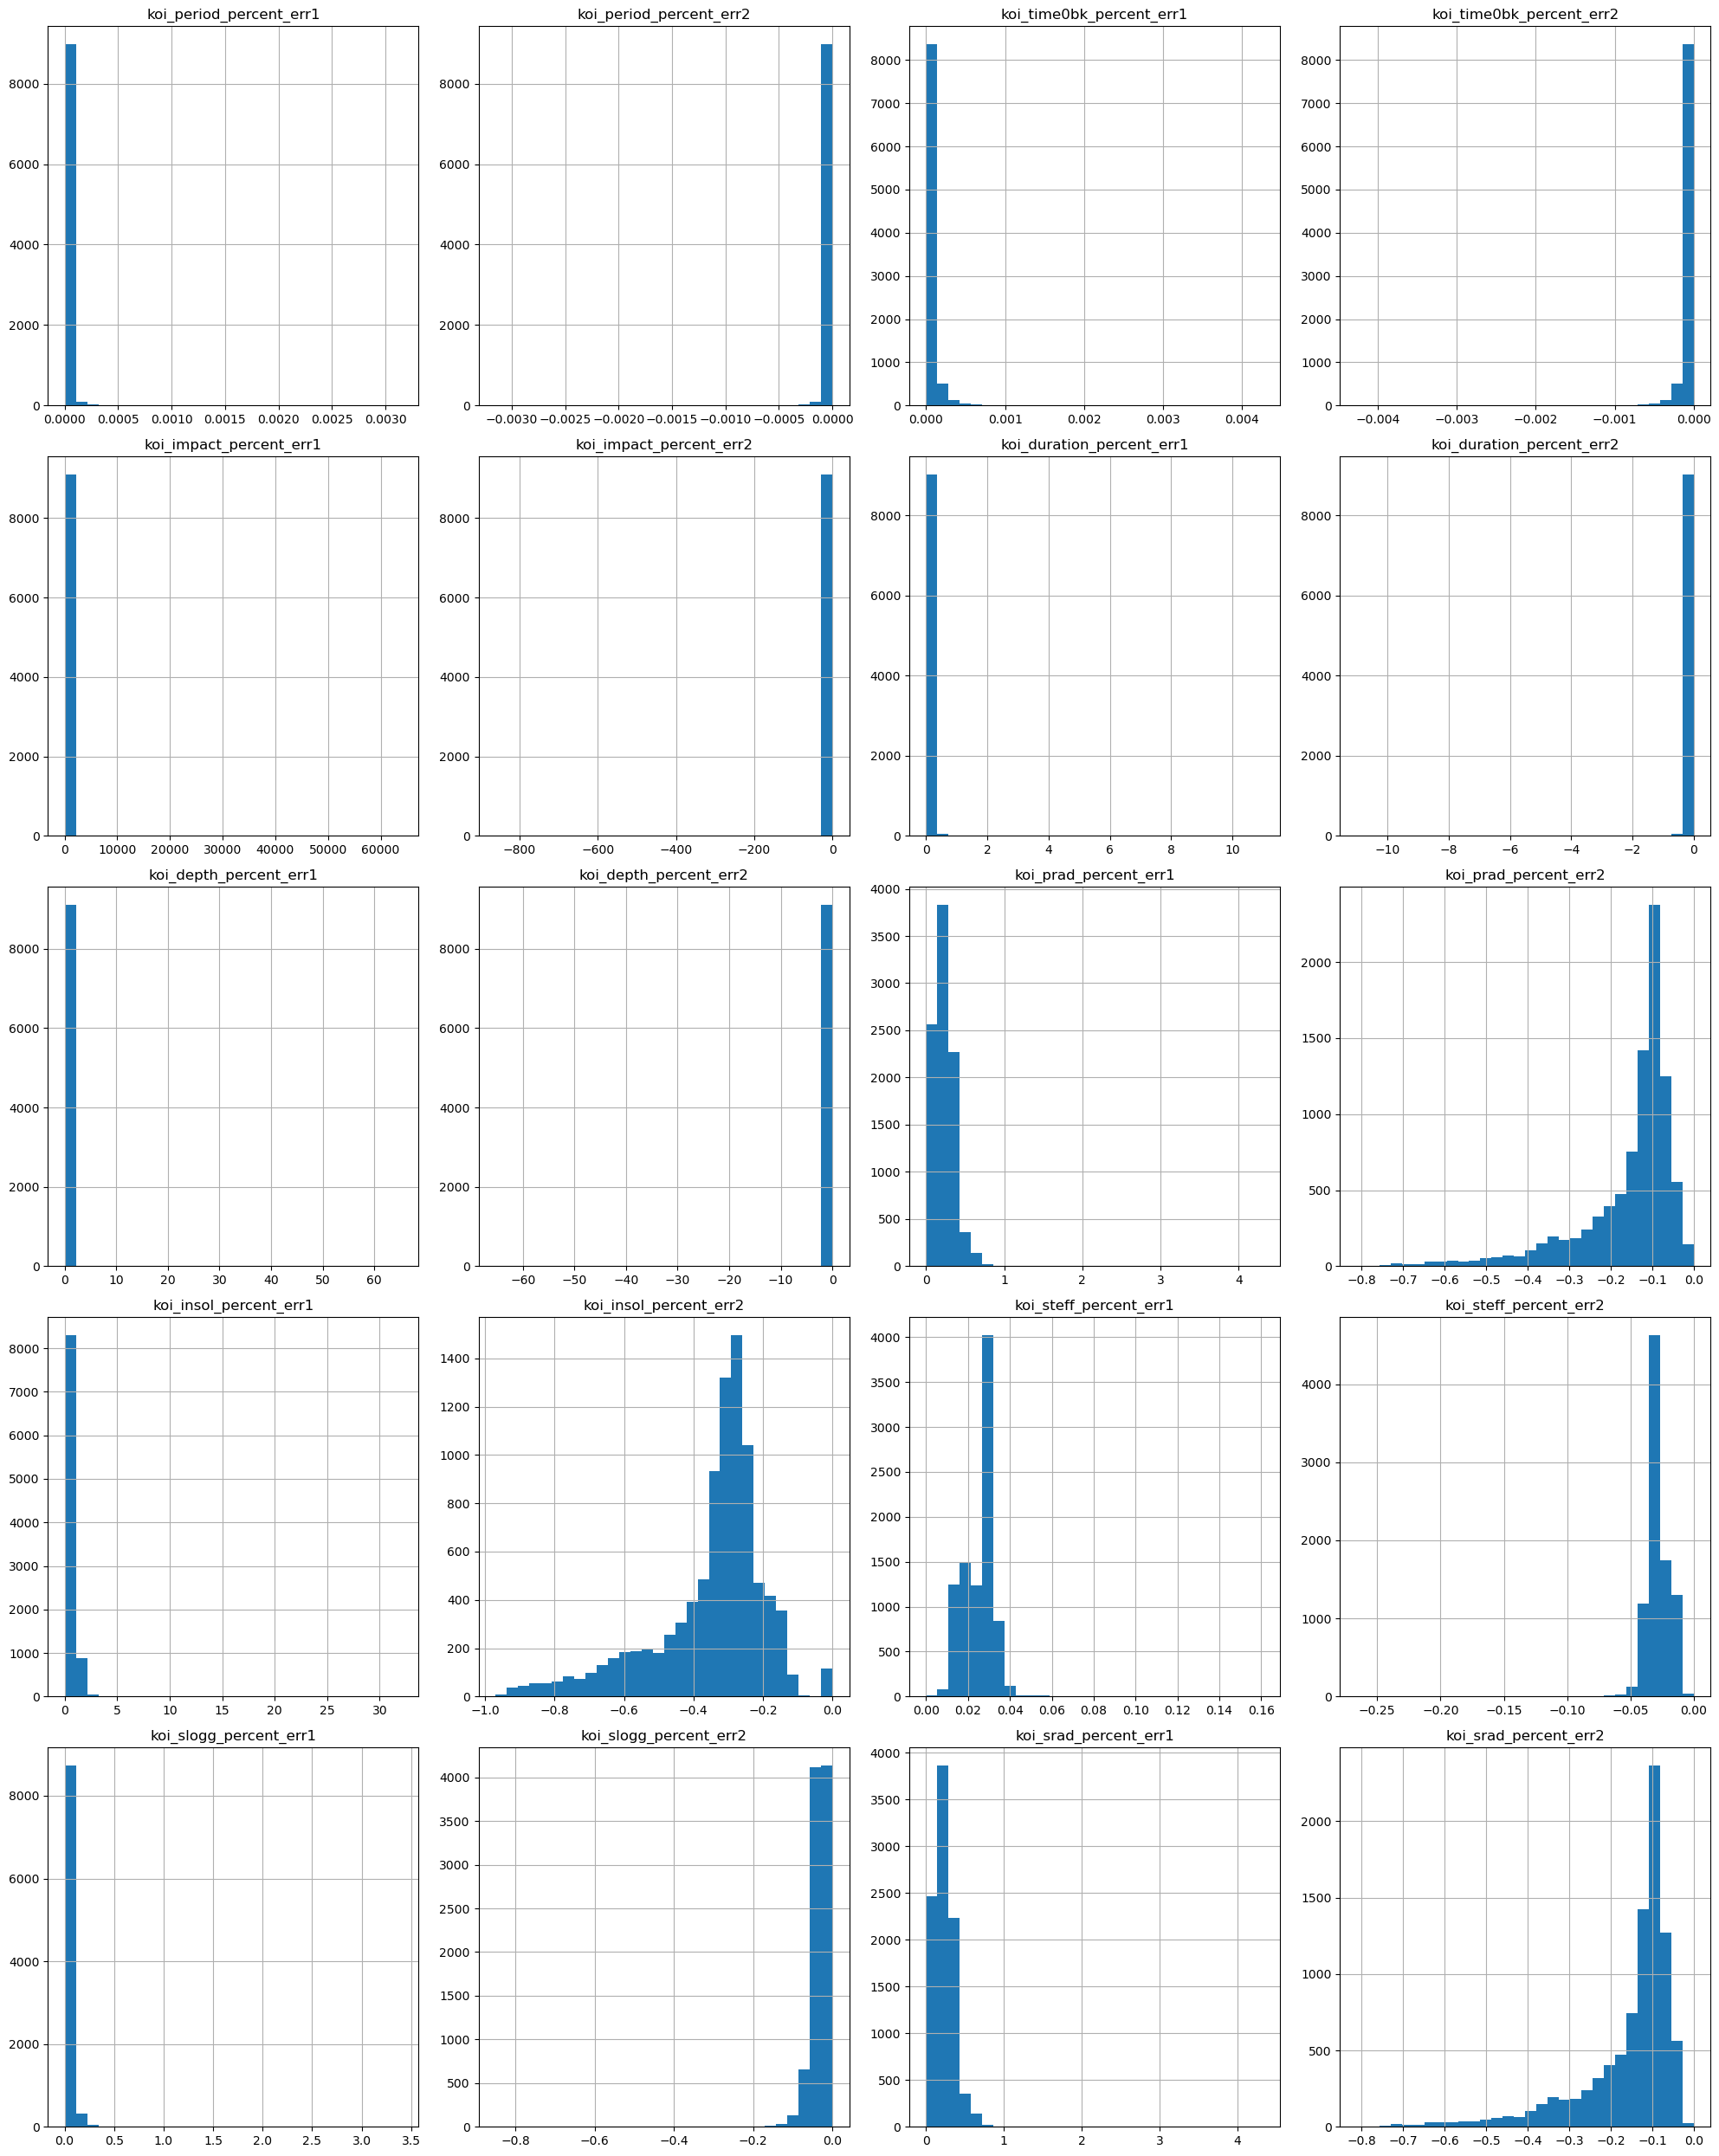

In [91]:
#create plots of distributions of prcnt_err

# Setting up the figure with 5 rows and 4 columns
fig, axes = plt.subplots(5,4, figsize=(20, 25))
axes = axes.flatten() # Flatten the 2D array of axes for easy iterating

# Plotting histograms for each column
for i, col in enumerate(prcnt_err.columns):
    prcnt_err[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

From here we can see that some error values have a some sort of distribution. The variables with a clear distribution of values can be assumed to have fewer outliers. The variables that appear to be biased towards a particular few set of bins, or a single maybe be skewed by very extreme outliers. We can look at descriptive statistics and boxplots to further investigate. 

In [92]:
prcnt_err.describe()

,koi_period_percent_err1,koi_period_percent_err2,koi_time0bk_percent_err1,koi_time0bk_percent_err2,koi_impact_percent_err1,koi_impact_percent_err2,koi_duration_percent_err1,koi_duration_percent_err2,koi_depth_percent_err1,koi_depth_percent_err2,koi_prad_percent_err1,koi_prad_percent_err2,koi_insol_percent_err1,koi_insol_percent_err2,koi_steff_percent_err1,koi_steff_percent_err2,koi_slogg_percent_err1,koi_slogg_percent_err2,koi_srad_percent_err1,koi_srad_percent_err2
count,9110.000000,9110.000000,9.110000e+03,9.110000e+03,9095.000000,9095.000000,9110.000000,9110.000000,9110.000000,9110.000000,9201.000000,9201.000000,9242.000000,9242.000000,9096.000000,9081.000000,9096.000000,9096.000000,9096.000000,9096.000000
mean,0.000015,-0.000015,5.941832e-05,-5.941832e-05,14.204560,-0.792217,0.070187,-0.070187,0.080549,-0.080549,0.225265,-0.155523,0.690081,-0.348214,0.025288,-0.027984,0.030994,-0.033989,0.227879,-0.157278
std,0.000056,0.000056,1.477043e-04,1.477043e-04,671.755730,9.206087,0.172656,0.172656,0.842478,0.842478,0.151188,0.118754,0.633404,0.162781,0.007585,0.009839,0.056813,0.024771,0.150073,0.118256
min,0.000000,-0.003152,3.094371e-08,-4.265687e-03,0.000000,-862.000000,0.000000,-11.000000,0.000000,-65.315789,0.000000,-0.811479,0.000000,-0.970768,0.000000,-0.266083,0.000000,-0.851064,0.000000,-0.811451
25%,0.000002,-0.000013,7.640406e-06,-6.603010e-05,0.057746,-1.000000,0.014583,-0.088001,0.015536,-0.100000,0.133588,-0.184211,0.396839,-0.402326,0.019896,-0.033146,0.009772,-0.044954,0.137188,-0.186340
50%,0.000005,-0.000005,2.797777e-05,-2.797777e-05,0.385987,-0.734409,0.041460,-0.041460,0.051770,-0.051770,0.207148,-0.111650,0.630892,-0.304944,0.026985,-0.029773,0.015752,-0.030915,0.209866,-0.112201
75%,0.000013,-0.000002,6.603010e-05,-7.640406e-06,2.496152,-0.213181,0.088001,-0.014583,0.100000,-0.015536,0.299834,-0.085714,0.892581,-0.254016,0.029964,-0.020149,0.035300,-0.020779,0.300189,-0.086370
max,0.003152,0.000000,4.265687e-03,-3.094371e-08,64000.000000,0.000000,11.000000,0.000000,65.315789,0.000000,4.312500,0.000000,32.093290,0.000000,0.160914,0.000000,3.404255,0.000000,4.332231,0.000000


After reviewing the descriptive statistics above, we can look to remove some extreme outliers. 

In [102]:
#convert to all positive values
prcnt_err_abs = prcnt_err.copy().abs()
prcnt_err_abs.describe()

,koi_period_percent_err1,koi_period_percent_err2,koi_time0bk_percent_err1,koi_time0bk_percent_err2,koi_impact_percent_err1,koi_impact_percent_err2,koi_duration_percent_err1,koi_duration_percent_err2,koi_depth_percent_err1,koi_depth_percent_err2,koi_prad_percent_err1,koi_prad_percent_err2,koi_insol_percent_err1,koi_insol_percent_err2,koi_steff_percent_err1,koi_steff_percent_err2,koi_slogg_percent_err1,koi_slogg_percent_err2,koi_srad_percent_err1,koi_srad_percent_err2
count,9110.000000,9110.000000,9.110000e+03,9.110000e+03,9095.000000,9095.000000,9110.000000,9110.000000,9110.000000,9110.000000,9201.000000,9201.000000,9242.000000,9242.000000,9096.000000,9081.000000,9096.000000,9096.000000,9096.000000,9096.000000
mean,0.000015,0.000015,5.941832e-05,5.941832e-05,14.204560,0.792217,0.070187,0.070187,0.080549,0.080549,0.225265,0.155523,0.690081,0.348214,0.025288,0.027984,0.030994,0.033989,0.227879,0.157278
std,0.000056,0.000056,1.477043e-04,1.477043e-04,671.755730,9.206087,0.172656,0.172656,0.842478,0.842478,0.151188,0.118754,0.633404,0.162781,0.007585,0.009839,0.056813,0.024771,0.150073,0.118256
min,0.000000,0.000000,3.094371e-08,3.094371e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000002,0.000002,7.640406e-06,7.640406e-06,0.057746,0.213181,0.014583,0.014583,0.015536,0.015536,0.133588,0.085714,0.396839,0.254016,0.019896,0.020149,0.009772,0.020779,0.137188,0.086370
50%,0.000005,0.000005,2.797777e-05,2.797777e-05,0.385987,0.734409,0.041460,0.041460,0.051770,0.051770,0.207148,0.111650,0.630892,0.304944,0.026985,0.029773,0.015752,0.030915,0.209866,0.112201
75%,0.000013,0.000013,6.603010e-05,6.603010e-05,2.496152,1.000000,0.088001,0.088001,0.100000,0.100000,0.299834,0.184211,0.892581,0.402326,0.029964,0.033146,0.035300,0.044954,0.300189,0.186340
max,0.003152,0.003152,4.265687e-03,4.265687e-03,64000.000000,862.000000,11.000000,11.000000,65.315789,65.315789,4.312500,0.811479,32.093290,0.970768,0.160914,0.266083,3.404255,0.851064,4.332231,0.811451


In [103]:
#99th percentile values stored in a list
percentile_99th = [prcnt_err_abs[col].quantile(0.99) for col in prcnt_err_abs.columns]

In [109]:
#drop columns with values greater than the 99th percentile
for i, col in enumerate(prcnt_err_abs.columns):
    prcnt_err_abs = prcnt_err_abs.loc[prcnt_err_abs[col] < percentile_99th[i]]

In [116]:
#checking values again. 
prcnt_err_abs.describe()

,koi_period_percent_err1,koi_period_percent_err2,koi_time0bk_percent_err1,koi_time0bk_percent_err2,koi_impact_percent_err1,koi_impact_percent_err2,koi_duration_percent_err1,koi_duration_percent_err2,koi_depth_percent_err1,koi_depth_percent_err2,koi_prad_percent_err1,koi_prad_percent_err2,koi_insol_percent_err1,koi_insol_percent_err2,koi_steff_percent_err1,koi_steff_percent_err2,koi_slogg_percent_err1,koi_slogg_percent_err2,koi_srad_percent_err1,koi_srad_percent_err2
count,5.397000e+03,5.397000e+03,5.397000e+03,5.397000e+03,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000
mean,9.478759e-06,9.478759e-06,4.157609e-05,4.157609e-05,2.172659,0.470013,0.050724,0.050724,0.052552,0.052552,0.225663,0.156918,0.677704,0.354296,0.025299,0.028173,0.028996,0.033229,0.225647,0.156918
std,1.555310e-05,1.555310e-05,5.901114e-05,5.901114e-05,8.418009,0.353578,0.058629,0.058629,0.055204,0.055204,0.113406,0.108292,0.333017,0.151479,0.006471,0.008154,0.030388,0.017231,0.113399,0.108268
min,0.000000e+00,0.000000e+00,3.094371e-08,3.094371e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.979042e-07,6.979042e-07,3.637152e-06,3.637152e-06,0.026519,0.065253,0.008132,0.008132,0.006468,0.006468,0.145833,0.087591,0.419094,0.258896,0.019974,0.021943,0.009882,0.022217,0.145985,0.087568
50%,3.550980e-06,3.550980e-06,1.955612e-05,1.955612e-05,0.109005,0.644643,0.030709,0.030709,0.034347,0.034347,0.222222,0.114865,0.672129,0.309751,0.027032,0.029862,0.016133,0.033011,0.222717,0.114667
75%,1.083245e-05,1.083245e-05,5.558567e-05,5.558567e-05,0.558163,0.720588,0.071447,0.071447,0.082222,0.082222,0.298985,0.193798,0.885182,0.414481,0.029938,0.033271,0.036798,0.044697,0.298988,0.193806
max,1.323120e-04,1.323120e-04,4.673399e-04,4.673399e-04,108.113636,0.999779,0.358476,0.358476,0.286654,0.286654,0.628986,0.611080,2.018952,0.868066,0.038595,0.047755,0.193216,0.098256,0.627855,0.611080


We have eliminated some extreme outliers. The 99th percentile was used to simply identify *extreme* values. Without domain knowledge, we may lose valueable information if using the IQR method which removes a wider range of values. However, we can still see that some values have a high percentage of error. Such as `koi_impact_percent_err1`, which has a max value of 108.11 or 10800% error for a given observation. 

We can plot these on boxplots to help identify further outliers.

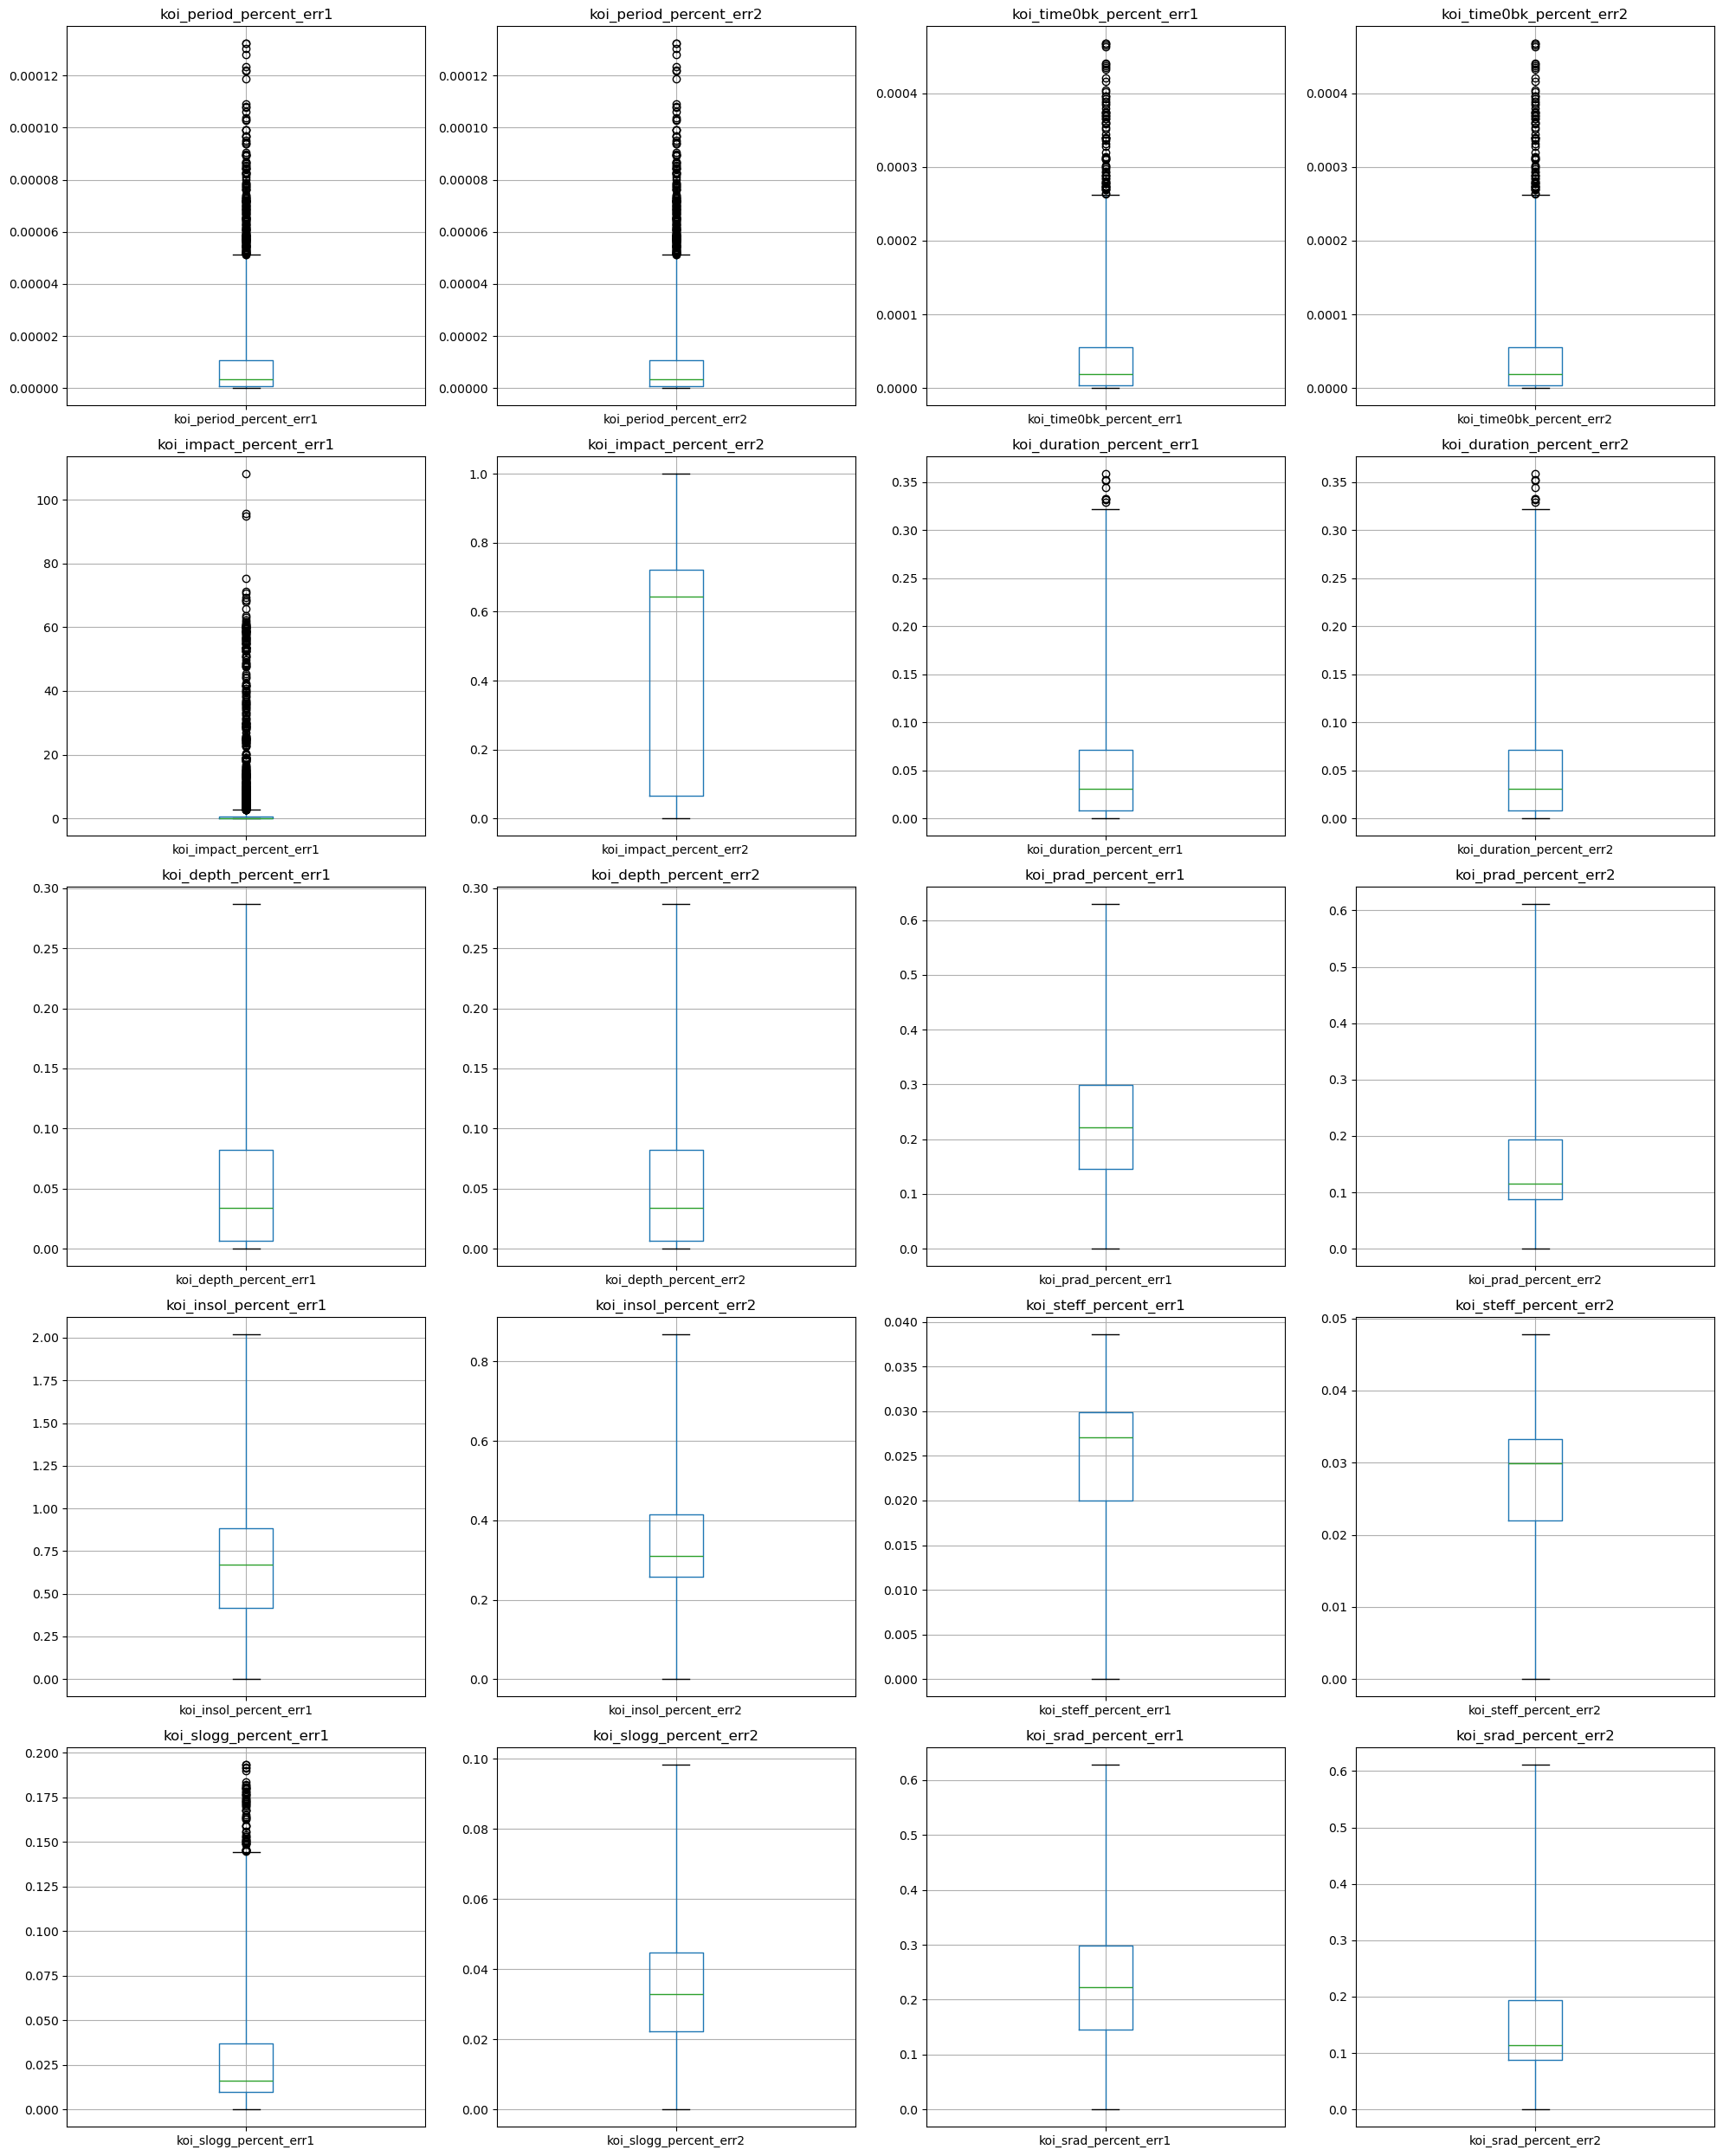

In [114]:
#Plot whisker plots of prsnt_err_abs to see outliers
# Setting up the figure with 5 rows and 4 columns
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iterating

# Plotting boxplots for each column
for i, col in enumerate(prcnt_err_abs.columns):
    prcnt_err_abs.boxplot(column=col, ax=axes[i], whis=4)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

After reviewing the above boxplots, we now only have one variable that may be cause for concern. The boxplots that show outliers for the most part are a reasonable *percentage* of error, such that they are less than 100%. Without further domain knowledge, it may be unwise to remove these outliers. 

The variable that still has some cause for concern is the `koi_impact_percent_err1`. There are a large number of outliers based on the boxplot, and the values range into extremes with regards to percentages. Without further domain knowledge, it still may be unwise to remove these outliers, however, we can take this into consideration when performing feature selectiong as part of our preprocessing.

In [117]:
# continuing with EDA
kois.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9564 entries, 1 to 9564
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9564 non-null   object 
 1   koi_pdisposition   9564 non-null   object 
 2   koi_score          8054 non-null   float64
 3   koi_fpflag_nt      9564 non-null   int64  
 4   koi_fpflag_ss      9564 non-null   int64  
 5   koi_fpflag_co      9564 non-null   int64  
 6   koi_fpflag_ec      9564 non-null   int64  
 7   koi_period         9564 non-null   float64
 8   koi_period_err1    9110 non-null   float64
 9   koi_period_err2    9110 non-null   float64
 10  koi_time0bk        9564 non-null   float64
 11  koi_time0bk_err1   9110 non-null   float64
 12  koi_time0bk_err2   9110 non-null   float64
 13  koi_impact         9201 non-null   float64
 14  koi_impact_err1    9110 non-null   float64
 15  koi_impact_err2    9110 non-null   float64
 16  koi_duration       9564 non-n

We will store `koi_disposition` and `koi_pdisposition`and `koi_score` in another dataframe, to be used later as our target variables.

In [ ]:
target_vars = kois[['koi_disposition', 'koi_pdisposition', 'koi_score']]